In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import seaborn as sns
import math


# nonparametric statistics
from scipy.stats import kruskal, wilcoxon

In [2]:
ess = pd.read_csv('ESSdata_Thinkful.csv')
print(ess)

     cntry    idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  \
0       CH     5.0     6    3.0      3.0     10.0     5.0    8.0      5.0   
1       CH    25.0     6    6.0      5.0      7.0     5.0    9.0      3.0   
2       CH    26.0     6    1.0      8.0      8.0     8.0    7.0      6.0   
3       CH    28.0     6    4.0      6.0      6.0     7.0   10.0      6.0   
4       CH    29.0     6    5.0      6.0      7.0     5.0    8.0      7.0   
5       CH    36.0     6    4.0      6.0      7.0     3.0    8.0      7.0   
6       CH    40.0     6    3.0      0.0      5.0     2.0    0.0      2.0   
7       CH    41.0     6    2.0      4.0      5.0     3.0   10.0      5.0   
8       CH    51.0     6    2.0      8.0      8.0     8.0    9.0      6.0   
9       CH    53.0     6    4.0      4.0      4.0     8.0    7.0      4.0   
10      CH    55.0     6    1.0      6.0      7.0     7.0    9.0      5.0   
11      CH    56.0     6    4.0      5.0      7.0     7.0    7.0      5.0   

# 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [3]:
ess12 = ess[ess['year'] == 6]
ess14 = ess[ess['year'] == 7]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE3B4096A0>]],
      dtype=object)

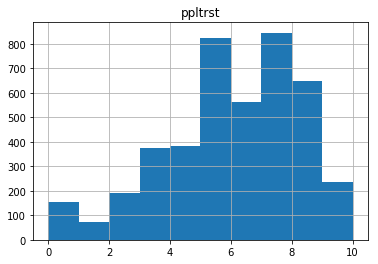

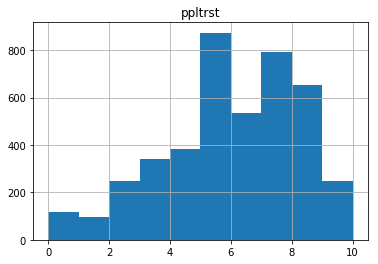

In [15]:
ess12.hist('ppltrst')
ess14.hist('ppltrst')

Data is relatively normally distributed, seems to be binomial given values are discrete. 
Can tell visually there's no difference by year, but let's check by country.

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


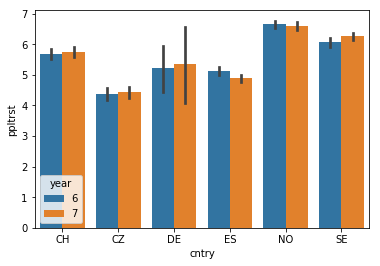

In [17]:
sns.barplot(x='cntry', y='ppltrst', hue='year', data=ess)

In [ ]:
No differences here, can tell visually. 
Would test this via t-test paired t-test if people surveyed were the same people or unpaired t-test if not.

In [86]:
countrys = list(ess.cntry.unique())

for country in countrys:
    #getdatafromeachcountry
    temp = ess[ess.cntry == country]
        # Printing  test results
    print(country, stats.ttest_ind(temp[temp['year']==6].ppltrst, 
                                         temp[temp['year']==7].ppltrst, axis=0, equal_var=True))
    print()

CH Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)

CZ Ttest_indResult(statistic=nan, pvalue=nan)

DE Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)

ES Ttest_indResult(statistic=nan, pvalue=nan)

NO Ttest_indResult(statistic=nan, pvalue=nan)

SE Ttest_indResult(statistic=nan, pvalue=nan)



No differences as predicted.

# 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE3B944550>]],
      dtype=object)

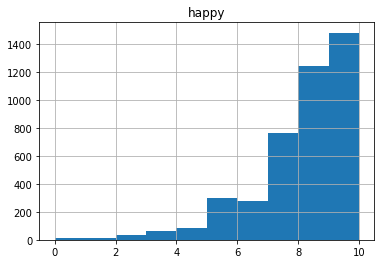

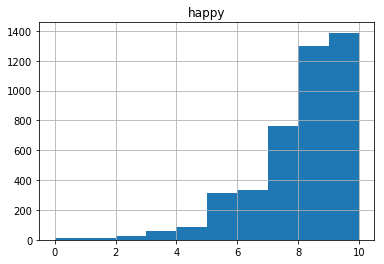

In [37]:
ess12.hist('happy')
ess14.hist('happy')

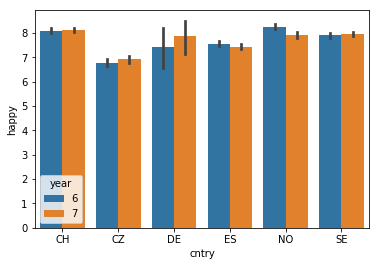

In [38]:
sns.barplot(x='cntry', y='happy', hue='year', data=ess)

More or less same as before but there could be some differences here....looks like variance might be too high though.

In [39]:
countrys = list(ess.cntry.unique())

for country in countrys:
    #getdatafromeachcountry
    temp = ess[ess.cntry == country]
        # Printing  test results
    print(country, scipy.stats.ttest_ind(temp[temp['year']==6].happy, 
                                         temp[temp['year']==7].happy, axis=0, equal_var=True))
    print()

CH Ttest_indResult(statistic=nan, pvalue=nan)

CZ Ttest_indResult(statistic=nan, pvalue=nan)

DE Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838)

ES Ttest_indResult(statistic=nan, pvalue=nan)

NO Ttest_indResult(statistic=nan, pvalue=nan)

SE Ttest_indResult(statistic=nan, pvalue=nan)



In [ ]:
Again, no differences.

# 3. Who reported watching more TV in 2012, men or women?


In [42]:
m_ess12=ess12[ess12['gndr'] == 1]
f_ess12=ess12[ess12['gndr'] == 2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE3BB2C908>]],
      dtype=object)

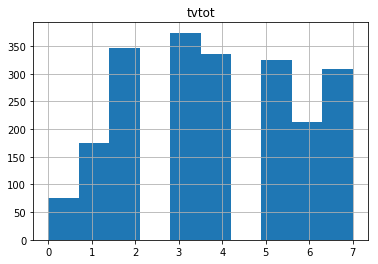

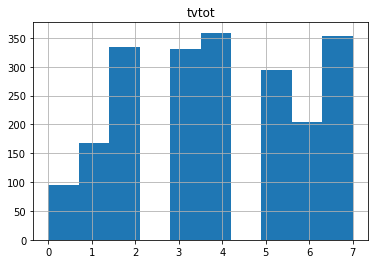

In [46]:
m_ess12.hist('tvtot')
f_ess12.hist('tvtot')

In [52]:
m_ess12.tvtot.describe()

count    2151.000000
mean        3.901906
std         1.983690
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: tvtot, dtype: float64

In [51]:
f_ess12.tvtot.describe()

count    2140.000000
mean        3.944393
std         2.049457
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: tvtot, dtype: float64

Women watched more but this isn't a significant difference. Data is not parametric so we will employ a non-parametric test here..

In [62]:
stats.kruskal(
    f_ess12.tvtot.sample(2000),
    m_ess12.tvtot.sample(2000))

KruskalResult(statistic=nan, pvalue=nan)

In [61]:
print('Wilcoxon Test:', wilcoxon(f_ess12.tvtot.sample(2000), 
                                 m_ess12.tvtot.sample(2000)))

Wilcoxon Test: WilcoxonResult(statistic=740409.5, pvalue=0.6296289787829666)


D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [ ]:
No difference.

# 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [68]:
ess12[ess12['partner'] == 1].pplfair.mean()

6.080736012016523

In [69]:
ess12[ess12['partner'] == 2].pplfair.mean()

5.856965174129353

This question is deceptive. People who were living with a partner were more likely to believe people were fair based on the numbers.
Whether this effect was statistically significant and reflective of a difference between the groups is uncertain.

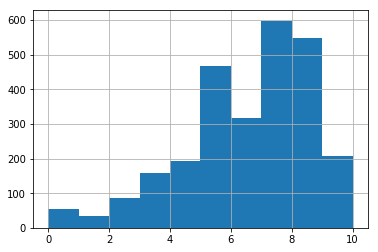

In [72]:
ess12[ess12['partner'] == 1].pplfair.hist()

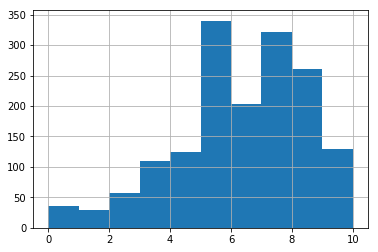

In [73]:
ess12[ess12['partner'] == 2].pplfair.hist()

In [80]:
scipy.stats.ttest_ind(ess12[ess12['partner'] == 2].pplfair.sample(500), ess12[ess12['partner'] == 1].pplfair.sample(500), axis=0, equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

# 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out

In [27]:
for country in countrys:
    #getdatafromeachcountry
    temp = ess14[ess14.cntry == country]
        # Printing  test results
    print(country, temp['sclmeet'].describe())
    print()

CH count    772.000000
mean       5.160622
std        1.308499
min        1.000000
25%        4.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64

CZ count    655.000000
mean       4.445802
std        1.481706
min        1.000000
25%        4.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64

DE count    14.000000
mean      4.428571
std       0.755929
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       6.000000
Name: sclmeet, dtype: float64

ES count    1211.000000
mean        5.260116
std         1.467855
min         1.000000
25%         4.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: sclmeet, dtype: float64

NO count    731.000000
mean       5.302326
std        1.347848
min        1.000000
25%        4.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64

SE count    908.000000
mean   

The Scandinavian country's are more social but probably not significantly so given the size of the intragroup variance.

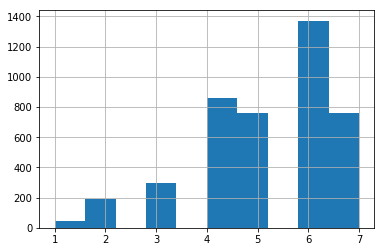

In [16]:
ess14['sclmeet'].hist()

Clearly non-normal and non-parametric need to rank these if we're to use a test. That being said there's no real way to truly normalize this test. Going to go ahead and use a t-test, not ideal but nothing is ideal with the way they've coded this data:

In [4]:
# Kruskal-Wallace Test

# Join all ratings together into a list, then ranking them.
ranks = stats.rankdata(
    ess14[ess12['cntry'] == 'SE'].sclmeet.tolist() +
    ess14[ess12['cntry'] == 'NO'].sclmeet.tolist() +
    ess14[ess12['cntry'] == 'CZ'].sclmeet.tolist() +
    ess14[ess14['cntry'] == 'DE'].sclmeet.tolist())

# Add the new ranked variables to the data frame.
#roller_coasters['Ranks_Europe'] = ranks[0:20]
#roller_coasters['Ranks_LatinAmerica'] = ranks[20:40]
#roller_coasters['Ranks_NorthAmerica'] = ranks[40:60]

# Average rank per group.
#groups = ['Ranks_Europe', 'Ranks_LatinAmerica', 'Ranks_NorthAmerica']
#print(roller_coasters[groups].apply(np.mean))

# Overall average rank.
ranks

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
#stats.kruskal(
 #   roller_coasters['Europe'],
#    roller_coasters['LatinAmerica'],
 #   roller_coasters['NorthAmerica'])#

array([1403.,  867.,  502., ..., 1403., 1403., 1403.])

In [42]:

# Printing Kruskal test statistic
print(kruskal(ess14[ess14['cntry'] == 'SE'].sclmeet.sample(200),
             ess14[ess14['cntry'] == 'NO'].sclmeet.sample(200),
             ess14[ess14['cntry'] == 'CZ'].sclmeet.sample(200)))

KruskalResult(statistic=47.16623160456868, pvalue=5.727735320916461e-11)


Seems to be a difference here....let's investigate

In [54]:
stats.ttest_ind(ess14[ess14['cntry'] == 'SE'].sclmeet.sample(100), ess14[ess14['cntry'] == 'CZ'].sclmeet.sample(100))

Ttest_indResult(statistic=4.5944709731815765, pvalue=7.712522928037804e-06)

Definetely a significant result here. Let's  try Sweden versus Norway.

In [55]:
stats.ttest_ind(ess14[ess14['cntry'] == 'SE'].sclmeet.sample(100), ess14[ess14['cntry'] == 'NO'].sclmeet.sample(100))

Ttest_indResult(statistic=1.2464062427023839, pvalue=0.21408788302238135)

Not significant.

# 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [56]:
ess['agea'].describe()

count    8355.000000
mean       47.470736
std        18.397369
min        15.000000
25%        33.000000
50%        47.000000
75%        62.000000
max       114.000000
Name: agea, dtype: float64

In [69]:
decile = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for dec in decile:
    print(ess['agea'].quantile(dec))

22.0
29.0
36.0
42.0
47.0
53.0
58.0
65.0
72.0


In [83]:
age_bins = ['0-22','22-29','29-36','36-42','42-47','47-53','53-58','58-65','65-72','72-115']
agecutoffs = [0, 22,29,36,42,47,53,58,65,72,115]

In [84]:
ess['age_groups'] = pd.cut(ess['agea'], bins=agecutoffs, labels=age_bins, right=False)

In [88]:
for country in countrys:
    # Isolating data from each country
    data_temp = ess[ess.cntry == country]
    for bin in age_bins:
        try:
            print(country, str('age ' + bin), data_temp[data_temp['age_groups'] == bin].sclact.describe())
        except ValueError:
            None
        print()

CH age 0-22 count    158.000000
mean       2.835443
std        0.901949
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64

CH age 22-29 count    144.000000
mean       2.812500
std        0.827573
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64

CH age 29-36 count    167.000000
mean       2.706587
std        0.852434
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64

CH age 36-42 count    157.000000
mean       2.700637
std        0.804355
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64

CH age 42-47 count    123.000000
mean       2.731707
std        0.830496
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dt

NO age 36-42 count    143.000000
mean       2.797203
std        0.783271
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64

NO age 42-47 count    156.000000
mean       2.858974
std        0.748751
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64

NO age 47-53 count    170.000000
mean       2.923529
std        0.799430
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64

NO age 53-58 count    119.000000
mean       2.865546
std        0.723976
min        1.000000
25%        2.500000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, dtype: float64

NO age 58-65 count    160.000000
mean       2.881250
std        0.771928
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: sclact, d

Young people tend to engage in more social activities, probably because they have more time. 
Apart from that across the board the Scandinavian countries tend to be more social.

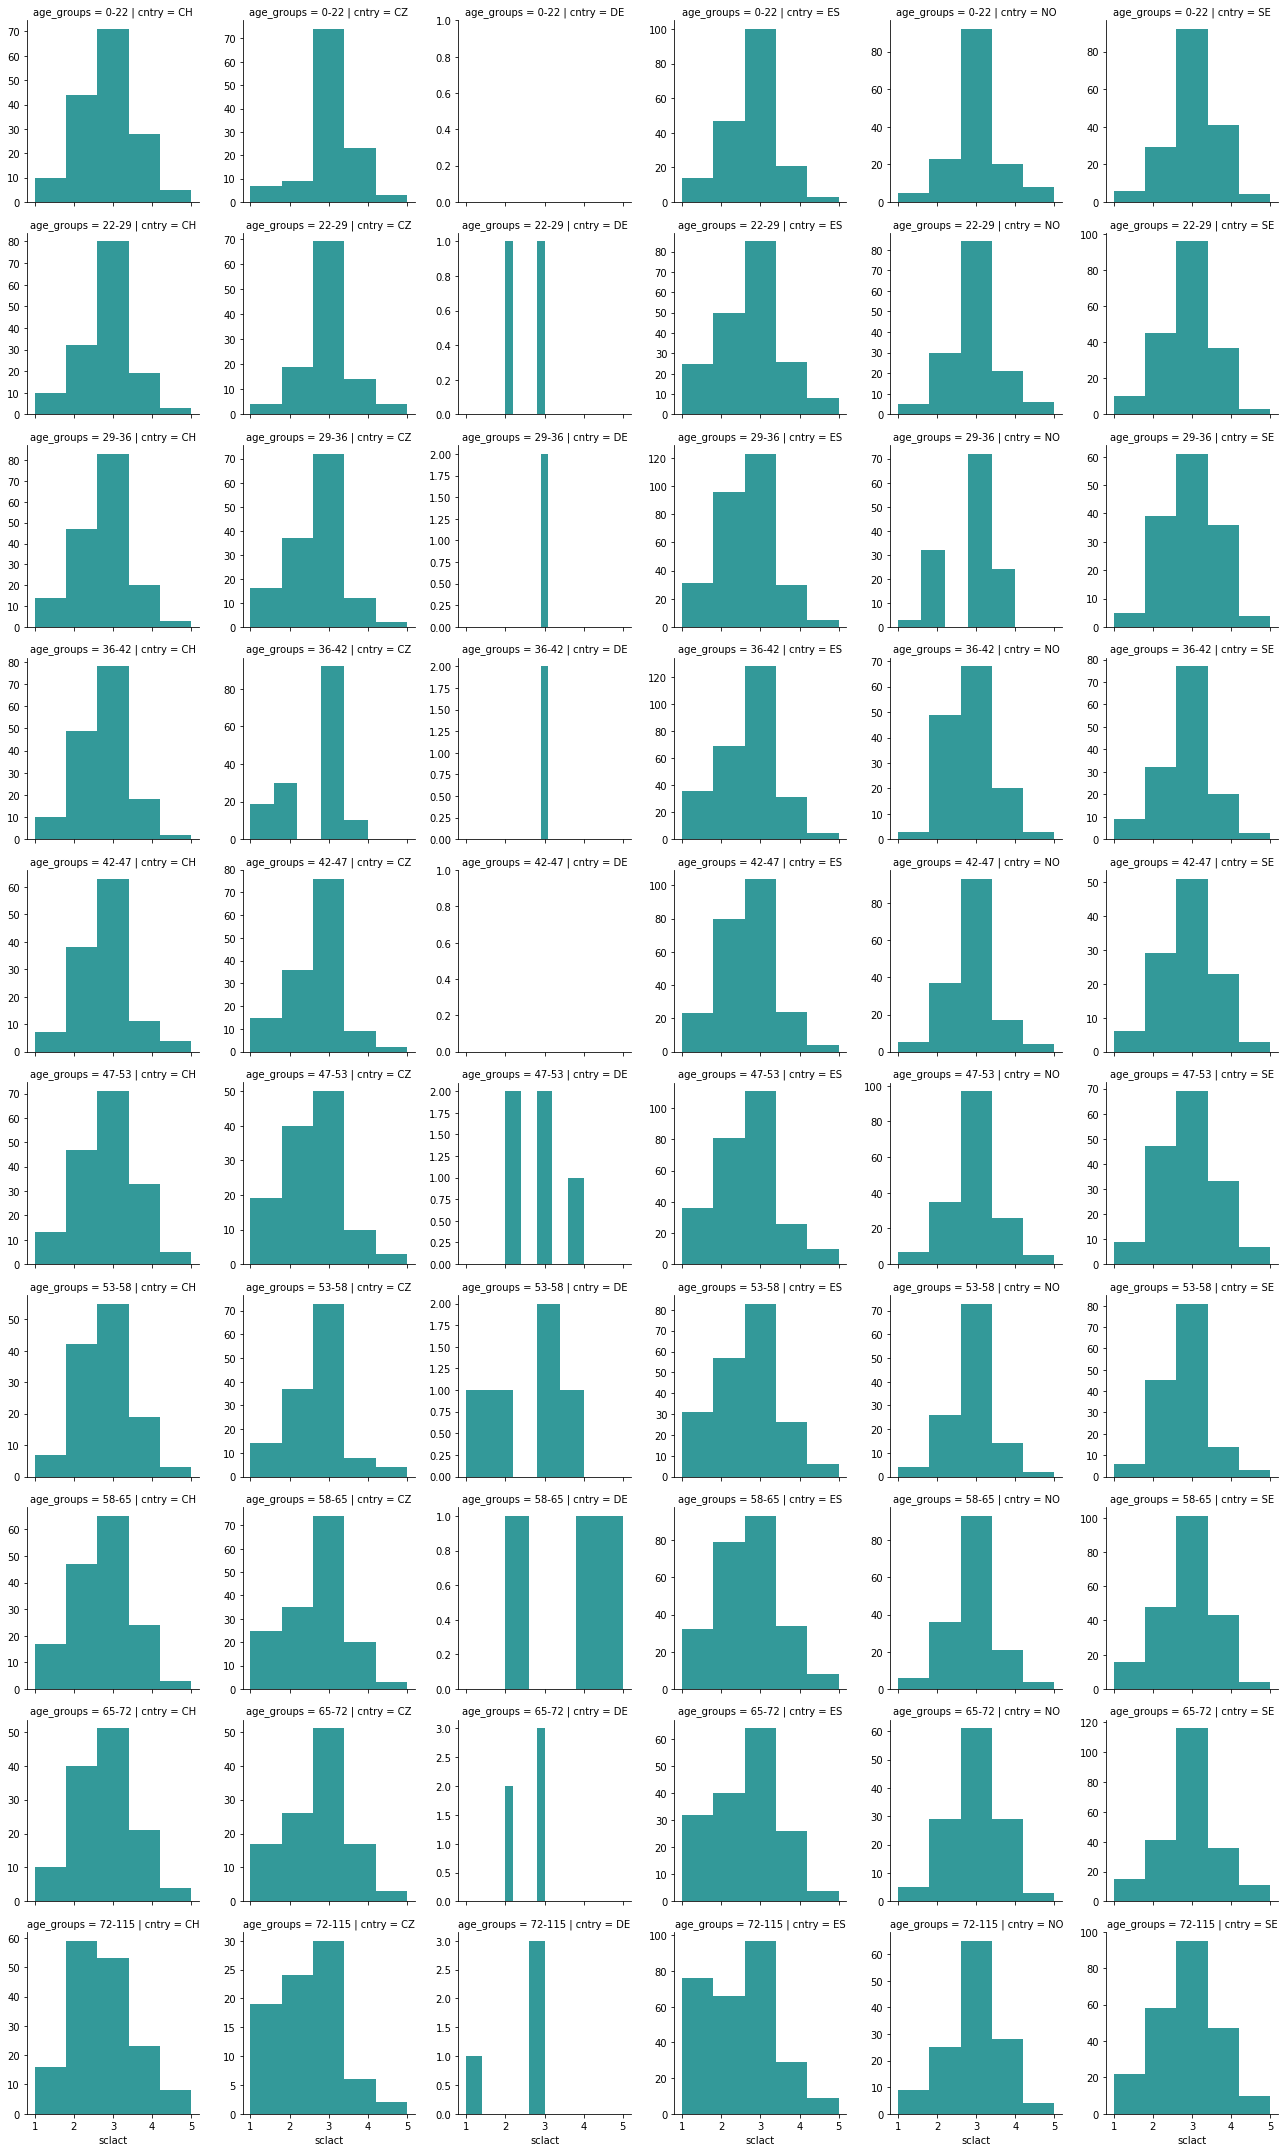

In [90]:
g = sns.FacetGrid(ess, row='age_groups', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclact', alpha=0.8, color='teal', bins=5)

These are broadly approximating binomial distributions. Depending on your way of looking at this a number of approaches are possible:


## Approach 1:
n is significantly high to assume that these are approximating normal distributions and accordingly a T-Test can be utilized.

## Approach 2:
Data is not normally distributed and accordingly, a 1-way ANOVA or Kruskal-Wallis could be used on the age groups (we've already done countries) and then countries.

## Approach 2
A 2-Way Anova could be used to explore country*age interactions.